### Neural Network Development and Explanations

In [ ]:
pip install keras==2.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.8/377.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.3.1 which is incompatible.


In [ ]:
pip install tensorflow==2.8.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
  Attempting uninstall: tensorboard-data-server
    Found existing installati

In [ ]:
pip install keras==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2 requires keras<2.9,>=2.8.0rc0, but you have keras 2.14.0 which is incompatible.


In [ ]:
pip install tensorflow

  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0


In [ ]:
import pandas as pd
import time

import numpy as np # linear algebra
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing
import time

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [ ]:
eng_feat = pd.read_csv('/content/LC_loan_after_feature_selection.csv')

In [ ]:
eng_feat.drop(columns = ["Unnamed: 0"], inplace = True)

In [ ]:
#Fully Paid: 0, Charged Off/Default : 1 (Label: Status, drop loan_status from Training Data)
X = eng_feat
y = pd.DataFrame(data = eng_feat["Status"], columns = ["Status"])

#### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_test.columns

Index(['loan_amnt', 'term', 'int_rate', 'loan_status', 'inq_last_6mths',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'delinq_amnt',
       'debt_settlement_flag', 'Status', 'A', 'B', 'C', 'D',
       'home_ownership_RENT', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'Not Verified', 'Source Verified', 'Verified', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [ ]:
def get_class_dist(data, name):
    unique, counts = np.unique(data, return_counts=True)
    pct = 100*(counts/len(data))
    d = dict(zip(unique, zip(counts, pct)))
    print(len(data), 'total examples in %s' % name)
    for key, values in d.items():
        print('class %d: %d examples,' % (key, values[0]), "{0:.2f}%".format(values[1]))
    print('')
    return

# Only supports Continuous Features
def oversampling(data, y_label, k = 5, seed = 1):

    from imblearn.over_sampling import SMOTE
    X = data.loc[:, data.columns != y_label]
    y = data[y_label]
    sm = SMOTE(sampling_strategy = 'auto', k_neighbors = k, random_state = seed, n_jobs = -1)
    X_res, y_res = sm.fit_resample(X, y)
    return X_res, y_res

# Supports Categorical and Continuous Features
def oversampling_nc(data, y_label, k = 5, seed = 1, cat_features = [None]):

    from imblearn.over_sampling import SMOTENC
    X = data.loc[:, data.columns != y_label]
    y = data[y_label]
    sm = SMOTENC(sampling_strategy = 'auto', k_neighbors = k, random_state = seed, categorical_features = cat_features, n_jobs = -1)
    X_res, y_res = sm.fit_resample(X, y)
    return X_res, y_res

In [ ]:
X_train_smote, y_train_smote = oversampling(X_train.drop(["loan_status"], axis = 1), 'Status')
X_smote = pd.merge(X_train_smote, y_train_smote, left_index = True, right_index = True)
get_class_dist(data=y_train_smote, name='y_train_smote')

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


713172 total examples in y_train_smote
class 0: 356586 examples, 50.00%
class 1: 356586 examples, 50.00%



In [ ]:
X_test.drop(["Status", "loan_status"], axis = 1, inplace = True)
X_train.drop(["Status", "loan_status"], axis = 1, inplace = True)

#### Running a baseline model

In [ ]:
X_train_smote_trial = X_train_smote[:10000]
y_train_smote_trial = y_train_smote[:10000]

In [ ]:
X_train_smote_trial

,loan_amnt,term,int_rate,inq_last_6mths,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10625,1,19.05,2.0,0,0.0,7892.880000,2464.06,0.0,878.39,...,0,1,0,0,0,0,0,0,0,0
1,14400,0,15.61,0.0,0,0.0,6596.990000,3175.78,0.0,0.00,...,1,0,0,0,0,0,0,0,0,0
2,11650,0,23.99,0.0,0,0.0,16962.141134,5312.14,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
3,16000,1,7.91,1.0,1,0.0,17266.283742,1266.28,0.0,0.00,...,1,0,0,0,0,0,0,0,0,0
4,7800,1,12.99,1.0,1,0.0,9440.170314,1640.17,0.0,0.00,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20000,0,17.09,0.0,1,0.0,24140.817764,4140.82,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
9996,11000,1,9.17,0.0,0,0.0,8641.390000,1383.63,0.0,581.58,...,0,0,0,0,0,0,0,0,0,0
9997,18600,1,6.92,0.0,1,0.0,19755.700000,1155.70,0.0,0.00,...,1,0,0,0,0,0,0,0,0,0
9998,16300,1,13.98,0.0,1,0.0,19737.310000,3437.31,0.0,0.00,...,1,0,0,0,0,0,0,0,0,0


### NN function

In [ ]:
def nn_model(neurons, input_dim, activation, n_layers, loss, optimizer):
    # create model
    #Model Paramters

    """
    neurons = list of neurons in each layer
    activation = list of activation functions
    input_dim = # of features
    n_layers = # of layers
    loss = string specifying loss
    optimizer = string specifying the optimizer

    """

    #Model 1
    #Dense -> (35,35,relu)
    #Final -> (1,sigmoid)
    # Binary_Crossentropy, adam


    model = Sequential()
    for i in range(n_layers):
        model.add(Dense(neurons[i], input_dim=input_dim, activation=activation[i]))

    model.add(Dense(1, activation=activation[-1]))
    # Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy']) #'binary_crossentropy' 'adam'

    return model

#### Model 1

In [ ]:
nn_model_1 = nn_model([35], 35, ["relu", "sigmoid"], 1, "binary_crossentropy" ,"adam")

In [ ]:
#nn_model1 - trained for 10000 data points
start = time.time()
nn_model_1.fit(X_train_smote_trial ,y_train_smote_trial, epochs=20, batch_size=32, verbose=1)
end = time.time()
print("Model Training Time: ", end-start)

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 73.5371 - accuracy: 0.9215
Epoch 2/20
313/313 [==============================] - 0s 2ms/step - loss: 0.8294 - accuracy: 0.9899
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.4028 - accuracy: 0.9948
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.9962
Epoch 5/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2060 - accuracy: 0.9963
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1977 - accuracy: 0.9965
Epoch 7/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9983
Epoch 8/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1810 - accuracy: 0.9963
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9979
Epoch 10/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1008 - accuracy: 0.997

In [ ]:
# predict probabilities for test set
yhat_probs = nn_model_1.predict(X_test[:1000], verbose=1)
# predict crisp classes for test set
yhat_probs = nn_model_1.predict(X_test[:1000], verbose=1)

# Get the predicted classes
yhat_classes = np.argmax(yhat_probs, axis=1)
#yhat_classes = nn_model_1.predict_classes(X_test[:1000], verbose=1)
# reduce to 1d array
yhat_probs = yhat_probs[:,0]
#yhat_classes = yhat_classes[:,0]

32/32 [==============================] - 0s 804us/step


#### Model 2

In [ ]:
nn_model_2 = nn_model([35, 50, 25], 35, ["relu", "relu", "sigmoid"], 2, "binary_crossentropy" ,"adam")

In [ ]:
#nn_model1 - trained for 10000 data points
start = time.time()
nn_model_2.fit(X_train_smote_trial ,y_train_smote_trial, epochs=20, batch_size=32, verbose=1)
end = time.time()
print("Model Training Time: ", end-start)

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 5.6179 - accuracy: 0.9746
Epoch 2/20
313/313 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.9924
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2573 - accuracy: 0.9943
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9962
Epoch 5/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.9962
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.7636 - accuracy: 0.9956
Epoch 7/20
313/313 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.9956
Epoch 8/20
313/313 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.9947
Epoch 9/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1601 - accuracy: 0.9973
Epoch 10/20
313/313 [==============================] - 0s 1ms/step - loss: 0.7150 - accuracy: 0.9954

In [ ]:
yhat2_probs = nn_model_2.predict(X_test[:1000], verbose=1)
# predict crisp classes for test set
yhat2_probs = nn_model_2.predict(X_test[:1000], verbose=1)

# Get the predicted classes
yhat2_classes = np.argmax(yhat2_probs, axis=1)
#yhat_classes = nn_model_1.predict_classes(X_test[:1000], verbose=1)
# reduce to 1d array
yhat2_probs = yhat2_probs[:,0]
#yhat_classes = yhat_classes[:,0]

32/32 [==============================] - 0s 801us/step


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test[:1000], yhat2_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test[:1000], yhat2_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test[:1000], yhat2_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test[:1000], yhat2_classes)
print('F1 score: %f' % f1)

Accuracy: 0.855000
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# ROC AUC
auc = roc_auc_score(y_test[:1000], yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test[:1000], yhat2_classes)
print(matrix)

ROC AUC: 1.000000
[[855   0]
 [145   0]]


#### Model 3

In [ ]:
nn_model_3 = nn_model([35,35], 35, ["relu", "relu", "sigmoid"], 2, "binary_crossentropy" ,"adam")

In [ ]:
#nn_model3 - trained for 10000 data points
start = time.time()
nn_model_3.fit(X_train_smote ,y_train_smote, epochs=20, batch_size=32, verbose=1)
end = time.time()
print("Model Training Time: ", end-start)

Epoch 1/20
22287/22287 [==============================] - 31s 1ms/step - loss: 0.7113 - accuracy: 0.9963
Epoch 2/20
22287/22287 [==============================] - 30s 1ms/step - loss: 0.0134 - accuracy: 0.9991
Epoch 3/20
22287/22287 [==============================] - 29s 1ms/step - loss: 0.0102 - accuracy: 0.9986
Epoch 4/20
22287/22287 [==============================] - 29s 1ms/step - loss: 0.0083 - accuracy: 0.9990
Epoch 5/20
22287/22287 [==============================] - 30s 1ms/step - loss: 0.0080 - accuracy: 0.9987
Epoch 6/20
22287/22287 [==============================] - 29s 1ms/step - loss: 0.0072 - accuracy: 0.9989
Epoch 7/20
22287/22287 [==============================] - 28s 1ms/step - loss: 0.0093 - accuracy: 0.9984
Epoch 8/20
22287/22287 [==============================] - 29s 1ms/step - loss: 0.0068 - accuracy: 0.9989
Epoch 9/20
22287/22287 [==============================] - 28s 1ms/step - loss: 0.0047 - accuracy: 0.9992
Epoch 10/20
22287/22287 [==============================

In [ ]:
# predict probabilities for test set
yhat_probs = nn_model_3.predict(X_test, verbose=1)
# predict crisp classes for test set
yhat_probs = nn_model_3.predict(X_test, verbose=1)

# Get the predicted classes
yhat_classes = np.argmax(yhat_probs, axis=1)

# reduce to 1d array if needed
yhat_probs = yhat_probs[:, 0]
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

3199/3199 [==============================] - 4s 1ms/step


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.870797
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

ROC AUC: 0.999884
[[89140     0]
 [13226     0]]


In [ ]:
nn_model_3.save("nn_model_3")

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("nn_model_3")

## Explaning NN Predictions using SHAP

Deep explainer requires sample to be passed as an array! Ensure to convert your data into array instead of a Data Frame!

In [ ]:

!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.6 MB/s eta 0:00:00


In [ ]:
# print the JS visualization code to the notebook
import shap
shap.initjs()

In [ ]:
type(X_test[:100])

pandas.core.frame.DataFrame

In [ ]:
#Using Deep Explainer for NN Based Model
# X_test_100 = tf.reshape(X_test[:100], [100, 35])
# np.array(X_test_100)
X_test_np = np.array(X_test[:100])

shap_explainer_100 = shap.DeepExplainer(reconstructed_model, X_test_np)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
X_test_ar_100 = np.array(X_test[:100])

In [ ]:
start = time.time()
shap_values_100= shap_explainer_100.shap_values(X_test_ar_100)
end = time.time()
print("Time required to get the SHAP values for 100 entries: ", end-start)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Time required to get the SHAP values for 100 entries:  0.8701577186584473


In [ ]:
for i in shap_values_100:
    print(i.shape)

(100, 35)


#### Obersvation

The above instance is predicted to be a Fully Paid Category! Since DeepExplainers take in an array as the input, the explainer does not print out the feature names.

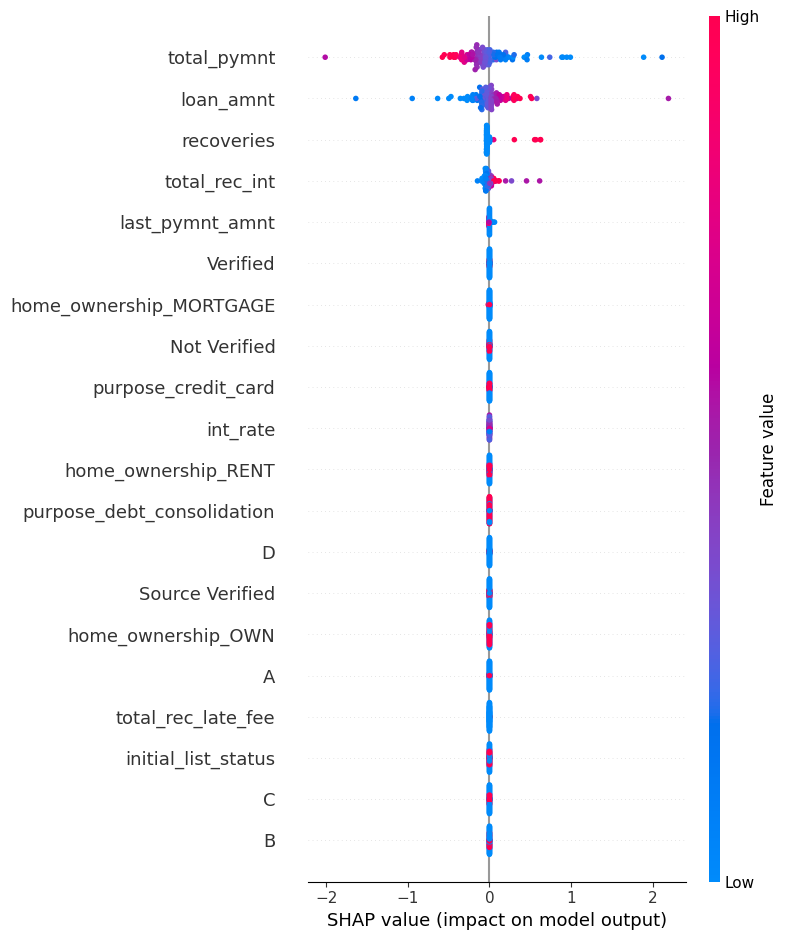

In [ ]:
shap.summary_plot(shap_values_100[0], X_test.iloc[:100, :], plot_type = "dot")

#### Observations

Deep Explainer shows some different resutls as compared to the other models trained so far (XGBOOST, RF, SVMs) All these models showed total payment amount as the most important feature whereas in case of NN based model, explanations suggest that total payment is the most important feature in explaing the models predictions!

1. Higher total payments made basically pushes the application towards the Fully Paid loan category.

2. Whereas on the other hand, borrowing a higher loan amount pushes the applicant towards Default category

### 2000 Samples

In [ ]:
shap_explainer_2000 = shap.DeepExplainer(reconstructed_model, np.array(X_test[:2000]))

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
X_test_ar_2000 = np.array(X_test[:2000])

In [ ]:
start = time.time()
shap_values_2000= shap_explainer_2000.shap_values(X_test_ar_2000)
end = time.time()
print("Time required to get the SHAP values for 100 entries: ", end-start)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Time required to get the SHAP values for 100 entries:  16.675493001937866


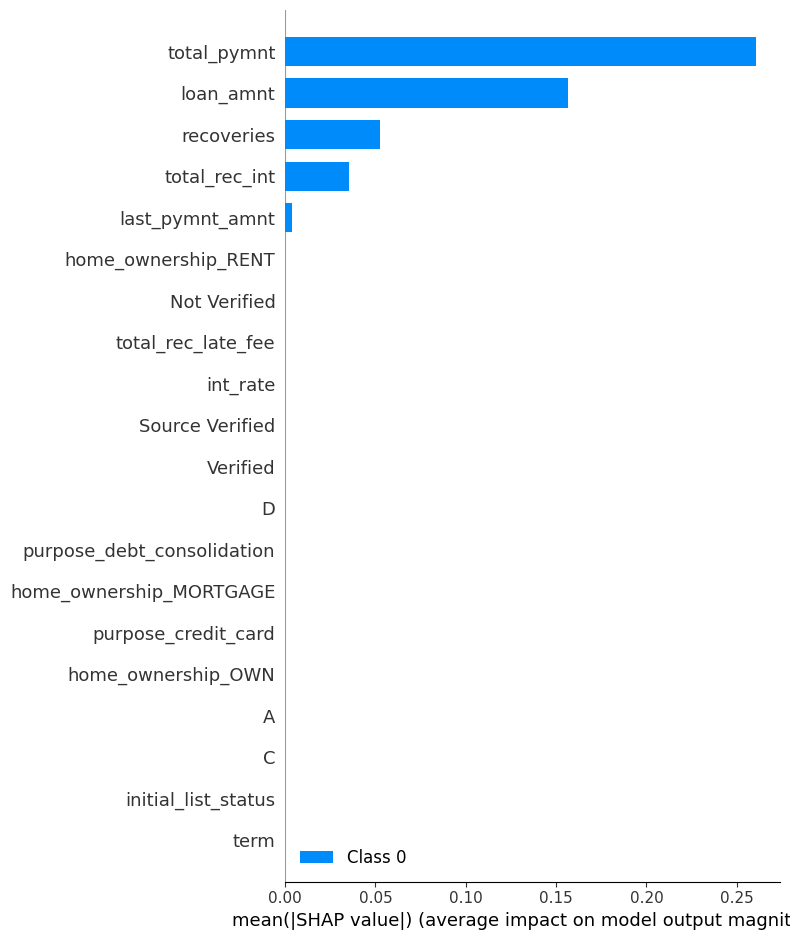

In [ ]:
shap.summary_plot(shap_values_2000, X_test.iloc[:2000, :], plot_type = "bar")

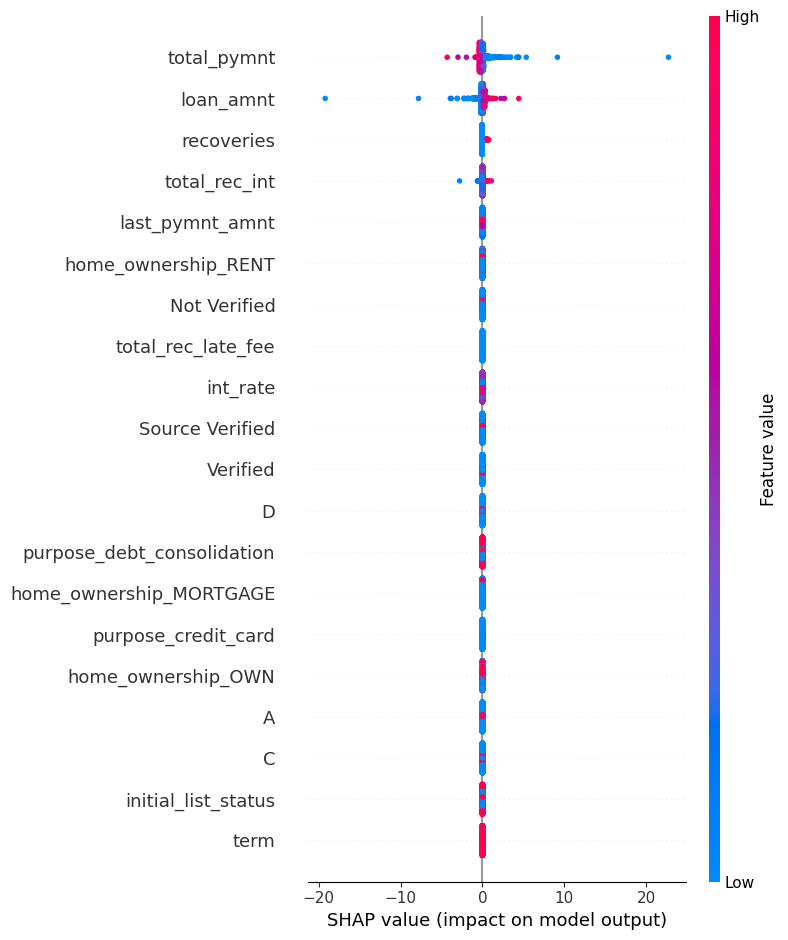

In [ ]:
shap.summary_plot(shap_values_2000[0], X_test.iloc[:2000, :], plot_type = "dot")

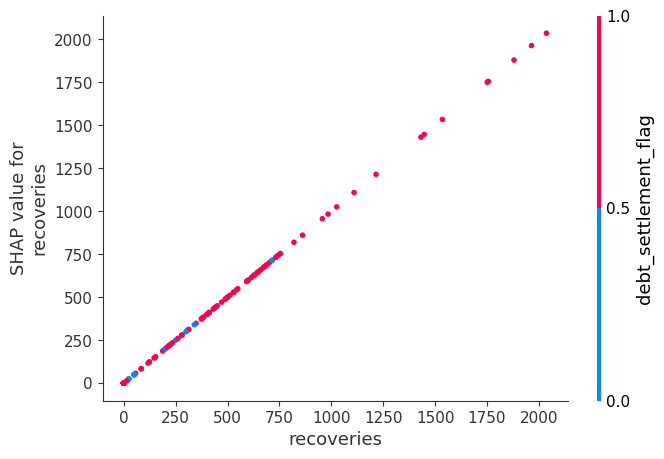

In [ ]:
#Explaining the Second Output Class (Class 1)
shap.dependence_plot("recoveries", X_test_ar_2000, X_test.iloc[0:2000,:])